# Task 1: Sentiment Labeling

In [1]:
# Step 1: Import required libraries
import pandas as pd  # For data manipulation
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch  # For device (GPU/CPU) support

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("test.csv")  # Read the CSV file
df.head()  # Preview the data

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [3]:
df.shape

(2191, 4)

In [4]:
# Step 3: Combine 'Subject' and 'body' fields into a single 'full_text' column
# This ensures the sentiment analysis model receives full context.
df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
df.head()

,Subject,body,date,from,full_text
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ..."
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...


In [5]:
# Step 4: Load the sentiment analysis model and tokenizer
# Using a pre-trained RoBERTa model fine-tuned on Twitter sentiment data
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [6]:
# Step 5: Create a sentiment analysis pipeline
# Check if GPU is available for faster processing
device = 0 if torch.cuda.is_available() else -1
sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

Device set to use cpu


In [7]:
# Step 6: Prepare the text data for sentiment analysis
texts = df['full_text'].fillna("").astype(str).tolist()  # Use only the email body

In [8]:
# Step 7: Run sentiment analysis on all messages
# Automatically labels each message using the transformer model
results = sentiment_task(texts, truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [9]:
# Step 8: Map model output labels to human-readable sentiment labels
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}
df["Sentiment"] = [label_map[r["label"]] for r in results]


In [10]:
# Step 9: Save the augmented dataset with sentiment labels
df.to_csv("test_with_roberta_sentiment.csv", index=False)
print("Done! Results saved to test_with_roberta_sentiment.csv")

Done! Results saved to test_with_roberta_sentiment.csv


## Observation

After loading the `test.csv` dataset, we observed that it contains **2,191 internal employee emails**, with fields such as **Subject**, **Body**, **Date**, and **From**. These fields represent individual communication threads between employees.

To ensure we captured the **complete context** of each message, we combined the **Subject** and **Body** fields into a new column called `full_text`.

For sentiment labeling, we utilized the **`cardiffnlp/twitter-roberta-base-sentiment`** model — a **transformer-based NLP model** fine-tuned specifically for **short-form, informal text** such as tweets. This made it highly suitable for internal emails, which often share a similar structure and tone.

Each message was automatically labeled as **Positive**, **Neutral**, or **Negative**, and the resulting sentiment labels were added as a new column in the dataset. The updated, labeled dataset was then saved for use in **exploratory analysis**, **employee-level scoring**, and **predictive modeling** in subsequent tasks.


# Task 2: Exploratory Data Analysis (EDA)

In [11]:
# Step 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")

In [12]:
# Step 1: Load dataset
# Load the dataset with sentiment labels
df = pd.read_csv("test_with_roberta_sentiment.csv")
df.head()  # Preview first few rows

,Subject,body,date,from,full_text,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ...",Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...,Neutral


In [13]:
# Step 2: Dataset Summary
# Check data types and non-null counts
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   full_text  2191 non-null   object
 5   Sentiment  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB


Subject      0
body         0
date         0
from         0
full_text    0
Sentiment    0
dtype: int64

In [14]:
# Step 3: Convert Date Column to Datetime Format
# Convert 'date' column to datetime format for time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Create 'month' column (Period format) for grouping
df['month'] = df['date'].dt.to_period('M')

# Create message length column
df['msg_length'] = df['body'].str.len()

df.head()

,Subject,body,date,from,full_text,Sentiment,month,msg_length
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...,Positive,2010-05,692
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ...",Negative,2010-07,315
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...,Neutral,2011-07,150
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...,Neutral,2010-03,155
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...,Neutral,2011-05,197


C:\Users\HP\AppData\Local\Temp\ipykernel_3152\3311135328.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


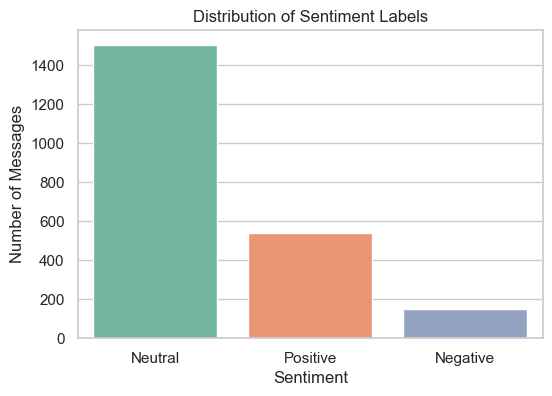

In [15]:
# Step 4: Sentiment Distribution Overview

# Count the number of messages per sentiment label
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6,4))

# Create a barplot of sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title("Distribution of Sentiment Labels")
plt.ylabel("Number of Messages")
plt.xlabel("Sentiment")
plt.savefig("Visualization/Distribution_of_sentiment_labels_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()


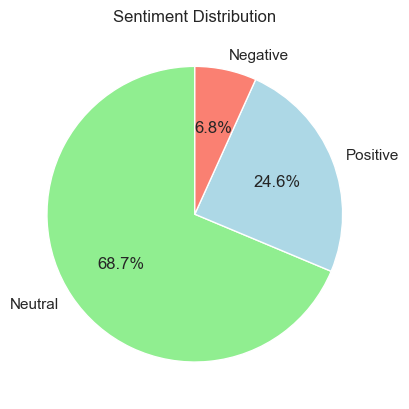

In [16]:
# Pie chart for sentiment distribution
df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightblue', 'salmon'],
    startangle=90
)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.savefig("Visualization/Distribution_of_sentiment_labels_pie_chart.png",dpi=300,bbox_inches='tight')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3152\1680426675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='msg_length', data=df, palette='coolwarm')


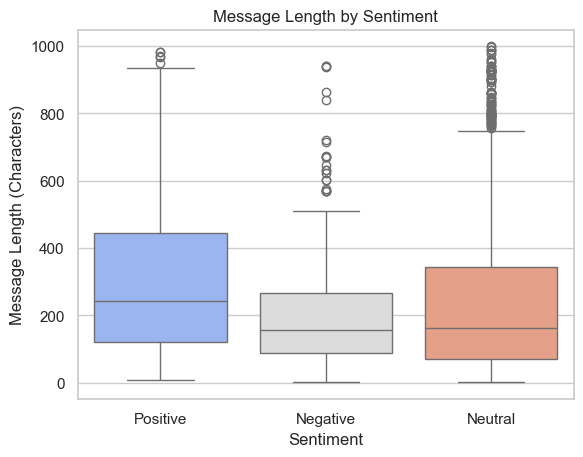

In [17]:
# Boxplot of message lengths by sentiment
sns.boxplot(x='Sentiment', y='msg_length', data=df, palette='coolwarm')
plt.title("Message Length by Sentiment")
plt.ylabel("Message Length (Characters)")
plt.xlabel("Sentiment")
plt.savefig("Visualization/Message_length_by_sentiment.png",dpi=300,bbox_inches='tight')
plt.show()

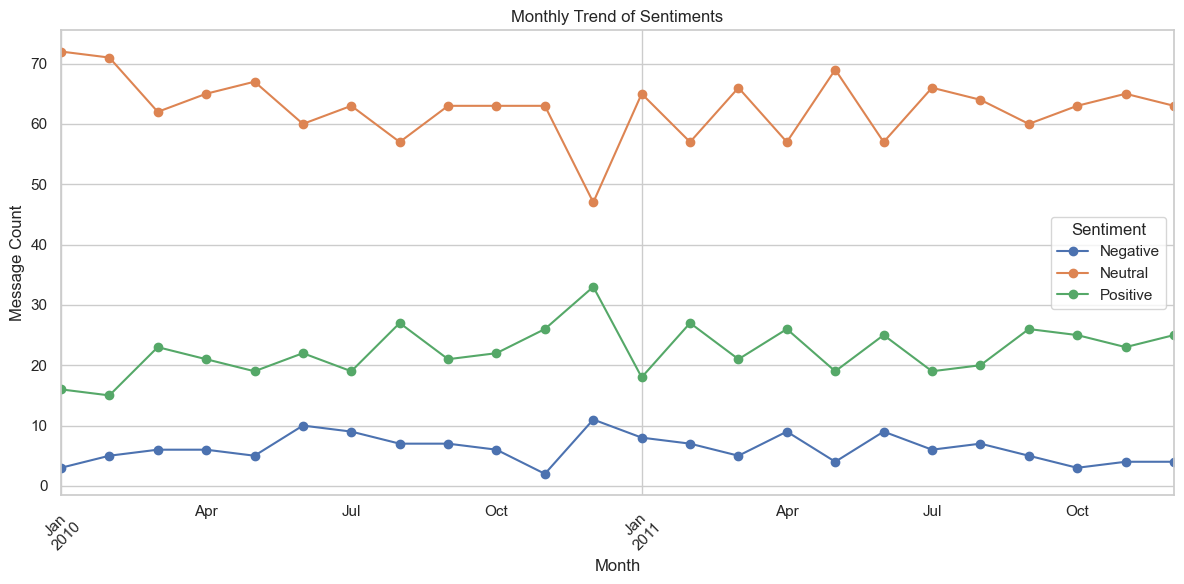

In [18]:
# Step 5: Sentiment Trend Over Time
# Group by month and sentiment to count messages
monthly_counts = df.groupby(['month', 'Sentiment']).size().reset_index(name='count')

# Reshape data for plotting
pivot_df = monthly_counts.pivot(index='month', columns='Sentiment', values='count').fillna(0)

# Line plot of sentiment trends over time
pivot_df.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Trend of Sentiments")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("Visualization/Monthly_Trend_of_sentiments_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()

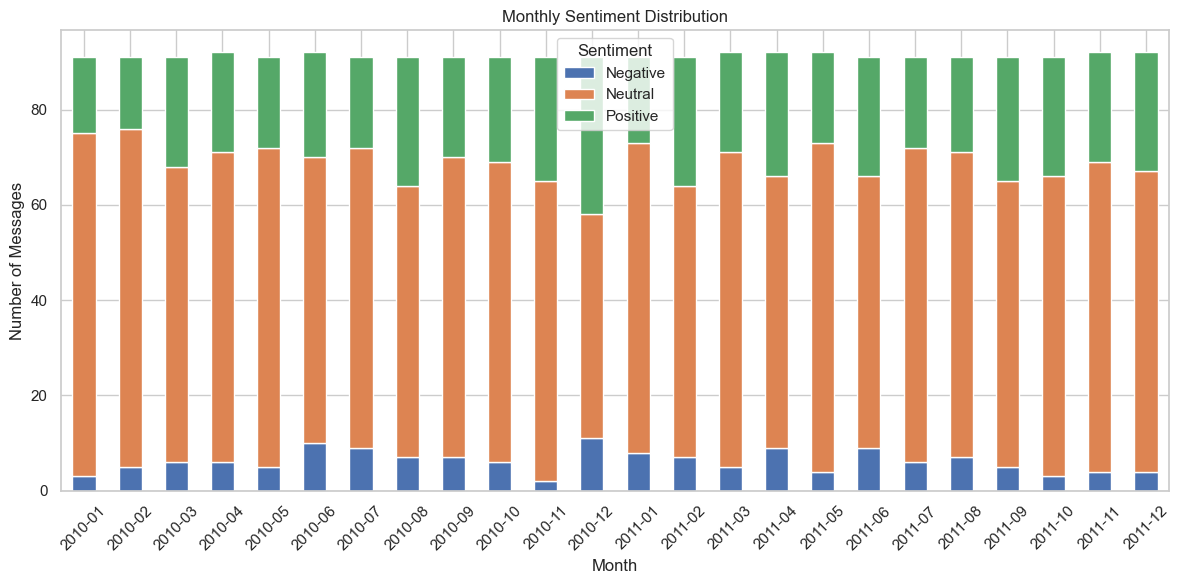

In [19]:
# Monthly Sentiment Bar Chart (stacked)
monthly_sentiment = df.groupby(['month', 'Sentiment']).size().unstack().fillna(0)

monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Sentiment Distribution')
plt.ylabel('Number of Messages')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Monthly_sentiment_Distribution_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()


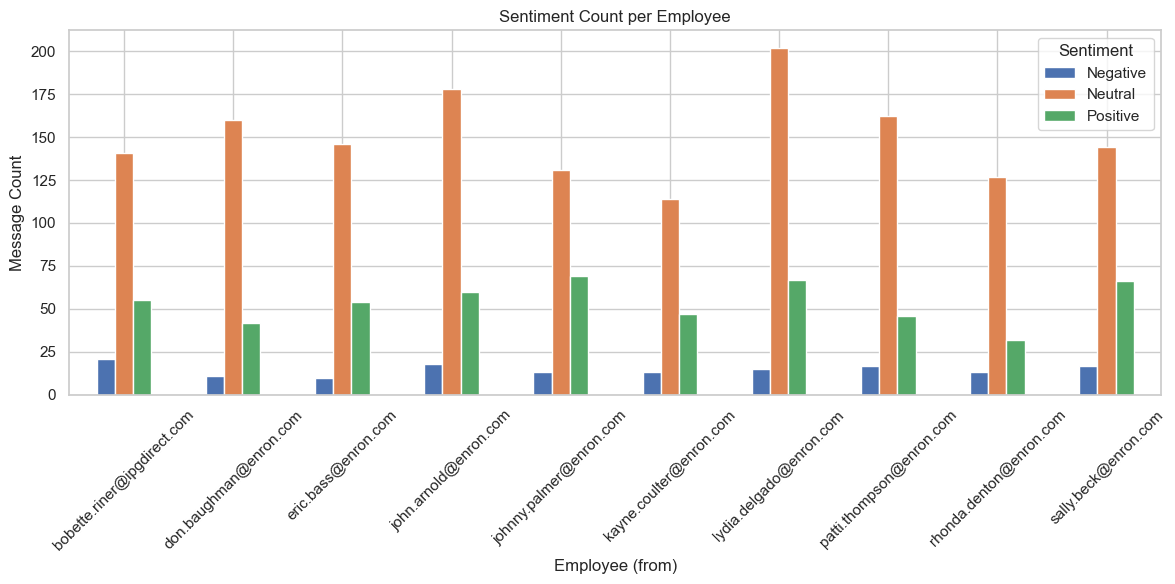

In [20]:
# Step 6: Explore additional patterns
# Employee-wise Sentiment Count (overall)
employee_sentiment = df.groupby(['from', 'Sentiment']).size().unstack().fillna(0)

employee_sentiment.plot(kind='bar', figsize=(12, 6))
plt.title('Sentiment Count per Employee')
plt.xlabel('Employee (from)')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Sentiment_Count_per_employee_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()


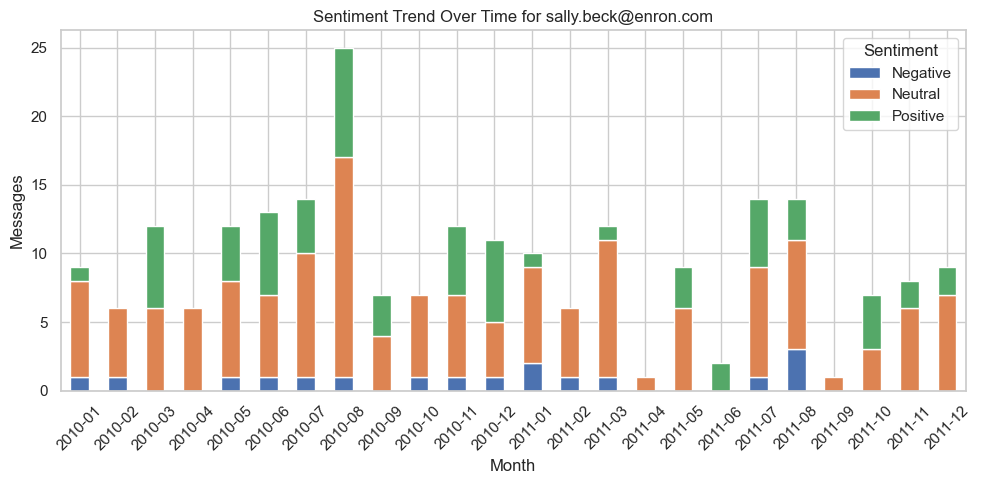

In [21]:
# Example: Track one employee's sentiment over time
employee_id = df['from'].unique()[0]  # choose the first employee (or set manually)

emp_df = df[df['from'] == employee_id]
emp_monthly = emp_df.groupby(['month', 'Sentiment']).size().unstack().fillna(0)

emp_monthly.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title(f'Sentiment Trend Over Time for {employee_id}')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Sentiment_Trend_Over_time_for_employee[0]_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()

In [22]:
print(employee_sentiment.columns)

Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Sentiment')


C:\Users\HP\AppData\Local\Temp\ipykernel_3152\3125337899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_df['month'] = emp_df['month'].astype(str)


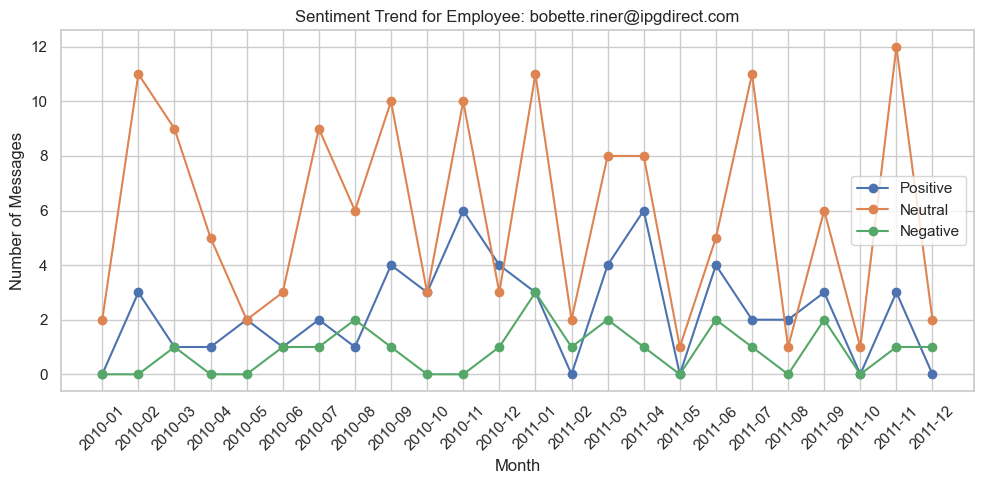

In [23]:
# Pick a specific employee to visualize (use an actual email from your dataset)
employee_sentiment = df.groupby(['from', 'month', 'Sentiment']).size().unstack(fill_value=0).reset_index()
sample_employee = employee_sentiment['from'].unique()[0]


# Filter for this employee
emp_df = employee_sentiment[employee_sentiment['from'] == sample_employee]

# Convert month to string for plotting
emp_df['month'] = emp_df['month'].astype(str)

# Plot sentiment trend
plt.figure(figsize=(10, 5))
plt.plot(emp_df['month'], emp_df['Positive'], label='Positive', marker='o')
plt.plot(emp_df['month'], emp_df['Neutral'], label='Neutral', marker='o')
plt.plot(emp_df['month'], emp_df['Negative'], label='Negative', marker='o')

plt.title(f"Sentiment Trend for Employee: {sample_employee}")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Visualization/Sentiment_Trend_for_employee[0]_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()


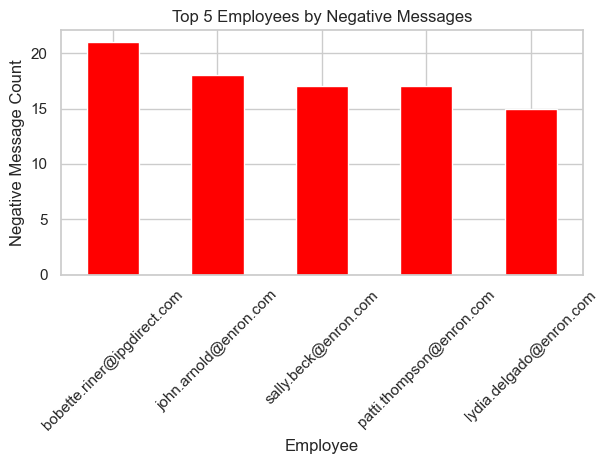

In [24]:
# Top 5 Employees with Most Negative Messages
top_negative = df[df['Sentiment'] == 'Negative']['from'].value_counts().head(5)

top_negative.plot(kind='bar', color='red')
plt.title('Top 5 Employees by Negative Messages')
plt.xlabel('Employee')
plt.ylabel('Negative Message Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Top_5_Employees_by_Negative_Messages_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()


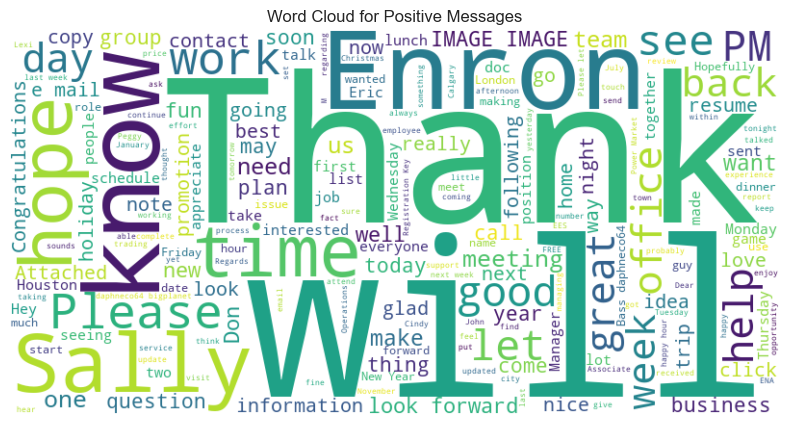

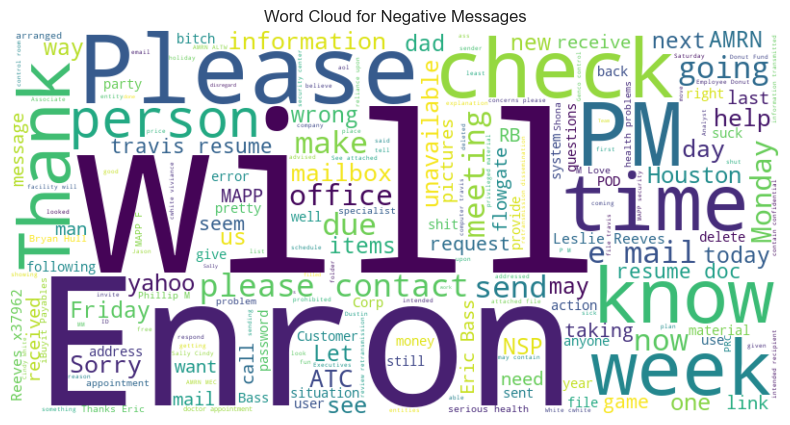

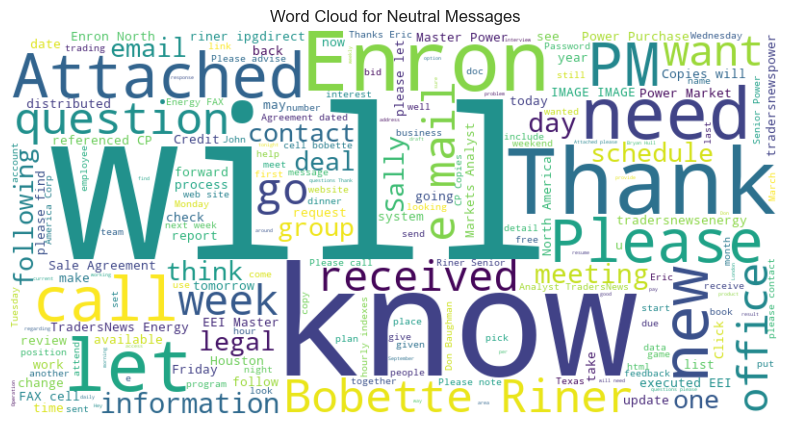

In [25]:
# Step 7: Word Clouds for Each Sentiment
from wordcloud import WordCloud

# Generate and display a word cloud for each sentiment category
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['Sentiment'] == sentiment]['body'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Messages")
    plt.savefig(f"Visualization/Word_Cloud_for_{sentiment.capitalize()}_messages.png",dpi=300,bbox_inches='tight')
    plt.show()


## Observation

#### 1. Sentiment Distribution
- The majority of emails were labeled as **Neutral (≈ 68.7%)**, followed by **Positive (24.6%)** and **Negative (6.8%)**.
- This suggests that most internal communications are **informational and emotion-neutral**, with a relatively small portion expressing strong emotions.

#### 2. Sentiment Trend Over Time
- **June 2010** and **December 2010** showed the **highest number of Negative messages** throughout the dataset.
- Interestingly, **December 2010** also had a **spike in Positive messages**, suggesting **polarized sentiment** during that period.
- At the same time, **December 2010 had the lowest number of Neutral messages**, pointing to an **emotionally significant phase** in employee communication.

#### 3. Employee-Level Patterns
- **Bobette Riner** sent the **most Negative messages**.
- **Johnny Palmer** sent the **most Positive messages**, indicating a consistently more optimistic communication style.
- **Lydia Delgado** had the **highest number of Neutral messages**, reflecting a more informational tone.

#### 4. Top 5 Employees by Negative Messages
The following employees had the highest count of Negative messages:
1. **Bobette Riner**
2. **John Arnold**
3. **Sally Beck**
4. **Patti Thompson**
5. **Lydia Delgado**

# Task 3: Employee Score Calculation

In [26]:
# Step 1: Map Sentiment Labels to Numerical Scores
# Define sentiment-to-score mapping
sentiment_to_score = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Create a new column for sentiment score
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_to_score)

In [27]:
# Step 2: Extract Employee Name from Email Address
# Extract name from email in 'from' column (before the @ symbol)
df['Employee_name'] = df['from'].str.extract(r'(^[^@]+)')

In [28]:
# Step 3: List of Unique Employees
# Display all unique employee names found
print(df['Employee_name'].unique())

['sally.beck' 'eric.bass' 'johnny.palmer' 'lydia.delgado' 'kayne.coulter'
 'patti.thompson' 'rhonda.denton' 'don.baughman' 'john.arnold'
 'bobette.riner']


In [29]:
# Count sentiment per employee per month
employee_sentiment = df.groupby(['from', 'month', 'Sentiment']).size().unstack(fill_value=0).reset_index()
employee_email = 'johnny.palmer@enron.com'


# Filter the employee_sentiment dataframe
employee_data = employee_sentiment[employee_sentiment['from'] == employee_email]

# Display 
print(employee_data)

Sentiment                     from    month  Negative  Neutral  Positive
96         johnny.palmer@enron.com  2010-01         0        5         1
97         johnny.palmer@enron.com  2010-02         1       13         4
98         johnny.palmer@enron.com  2010-03         1        6         4
99         johnny.palmer@enron.com  2010-04         0        7         1
100        johnny.palmer@enron.com  2010-05         0        1         0
101        johnny.palmer@enron.com  2010-06         1        5         4
102        johnny.palmer@enron.com  2010-07         0        3         1
103        johnny.palmer@enron.com  2010-08         1        4         3
104        johnny.palmer@enron.com  2010-09         2        7         3
105        johnny.palmer@enron.com  2010-10         1        9         5
106        johnny.palmer@enron.com  2010-11         0        1         0
107        johnny.palmer@enron.com  2010-12         0        1         0
108        johnny.palmer@enron.com  2011-01        

In [30]:
# Step 4: Aggregate Monthly Sentiment Scores per Employee
# Group data by employee and month, then sum sentiment scores
monthly_scores = df.groupby(['Employee_name', 'month'])['Sentiment_Score'].sum().reset_index()

# Rename columns for clarity
monthly_scores.columns = ['employee', 'month', 'monthly_score']

# Sort by month for chronological order
monthly_scores_sorted = monthly_scores.sort_values(by='month', ascending=True).reset_index(drop=True)

# Preview the result
print(monthly_scores_sorted)

           employee    month  monthly_score
0     bobette.riner  2010-01              0
1      don.baughman  2010-01              2
2         eric.bass  2010-01              3
3       john.arnold  2010-01              1
4     johnny.palmer  2010-01              1
..              ...      ...            ...
235   kayne.coulter  2011-12              3
236  patti.thompson  2011-12              3
237   lydia.delgado  2011-12              5
238   rhonda.denton  2011-12              3
239      sally.beck  2011-12              2

[240 rows x 3 columns]


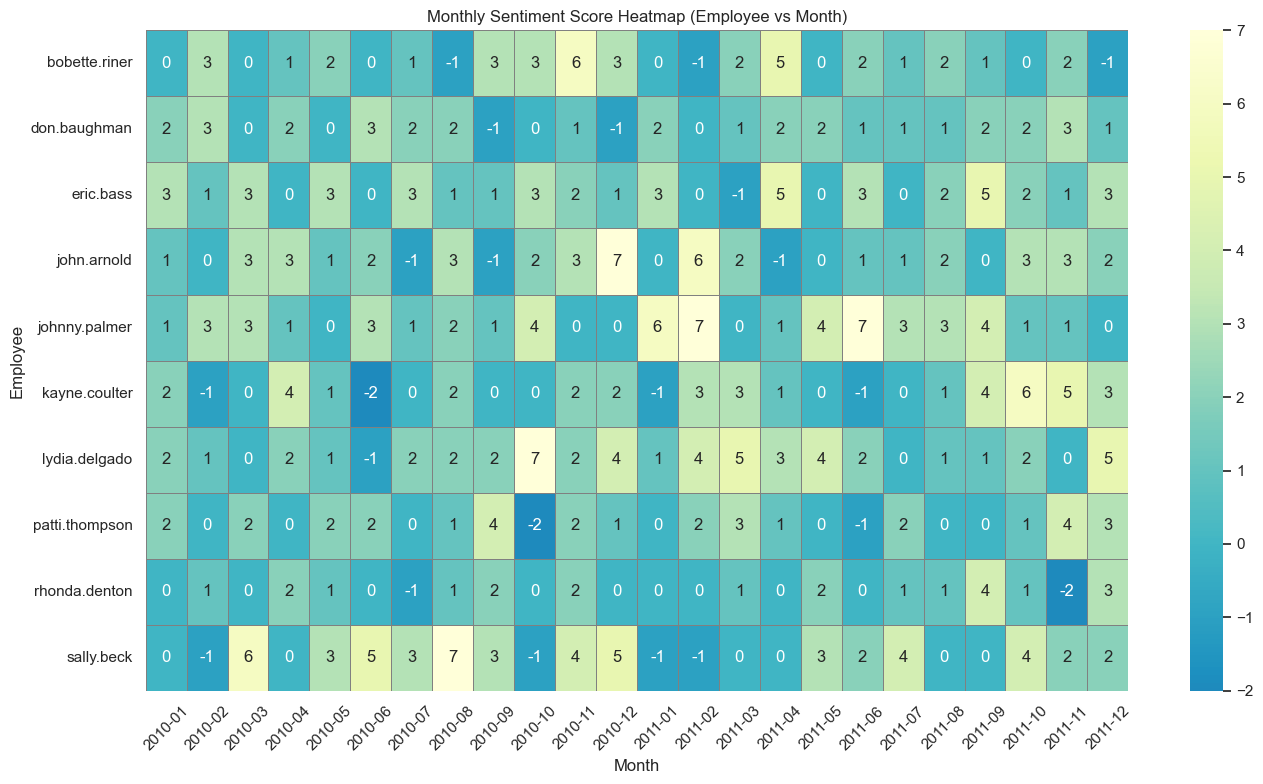

In [31]:
# Step 5: Visualize Scores Using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape data to create employee x month matrix
heatmap_data = monthly_scores_sorted.pivot(index='employee', columns='month', values='monthly_score').fillna(0)

# Plot heatmap with reversed sequential colormap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu_r",  # Reversed Yellow-Green-Blue colormap (darker = worse, lighter = better)
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Monthly Sentiment Score Heatmap (Employee vs Month)")
plt.xlabel("Month")
plt.ylabel("Employee")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Monthly_Sentiment_Score_Heatmap.png",dpi=300,bbox_inches='tight')
plt.show()


## Observation

After mapping sentiment labels to numerical scores (`Positive` = 1, `Neutral` = 0, `Negative` = -1), we aggregated sentiment scores on a monthly basis per employee and visualized them using a heatmap. This allowed us to identify key sentiment patterns across individuals.

- **Johnny Palmer** showed the **most consistently positive sentiment**. He recorded:
  - **8 positive messages** in **June 2011**
  - **7 in February 2011**
  - **6 in January 2011**
  - His sentiment score remained **positive across all months**, unlike others who had mixed or negative trends.

- **Kayne Coulter** had the **highest number of negative-scoring months**, with at least **5 months** showing a net negative sentiment score.

- Most employees had **moderate sentiment scores**, with **positive message counts usually below 4 per month**.

- The heatmap clearly reveals differences in engagement and tone among employees. It helps identify consistently positive communicators, as well as those who may need further attention due to repeated negativity.


#  Task 4: Employee Ranking

In [32]:
# Step 1: Rank Employees by Monthly Score

# Sort and select Top 3 Positive Employees per Month
top_positive = (
    monthly_scores_sorted
    .sort_values(by=['month', 'monthly_score', 'employee'], ascending=[True, False, True])
    .groupby('month')
    .head(3)  # top 3 per month
    .reset_index(drop=True)
)

# Sort and select Top 3 Negative Employees per Month
top_negative = (
    monthly_scores_sorted
    .sort_values(by=['month', 'monthly_score', 'employee'], ascending=[True, True, True])
    .groupby('month')
    .head(3)  # bottom 3 per month
    .reset_index(drop=True)
)

In [33]:
# Step 2: View Ranked Tables

print("Top 3 Positive Employees Per Month")
print(top_positive)

print("\n Top 3 Negative Employees Per Month")
print(top_negative)

Top 3 Positive Employees Per Month
          employee    month  monthly_score
0        eric.bass  2010-01              3
1     don.baughman  2010-01              2
2    kayne.coulter  2010-01              2
3    bobette.riner  2010-02              3
4     don.baughman  2010-02              3
..             ...      ...            ...
67  patti.thompson  2011-11              4
68    don.baughman  2011-11              3
69   lydia.delgado  2011-12              5
70       eric.bass  2011-12              3
71   kayne.coulter  2011-12              3

[72 rows x 3 columns]

 Top 3 Negative Employees Per Month
         employee    month  monthly_score
0   bobette.riner  2010-01              0
1   rhonda.denton  2010-01              0
2      sally.beck  2010-01              0
3   kayne.coulter  2010-02             -1
4      sally.beck  2010-02             -1
..            ...      ...            ...
67  lydia.delgado  2011-11              0
68      eric.bass  2011-11              1
69  bobette

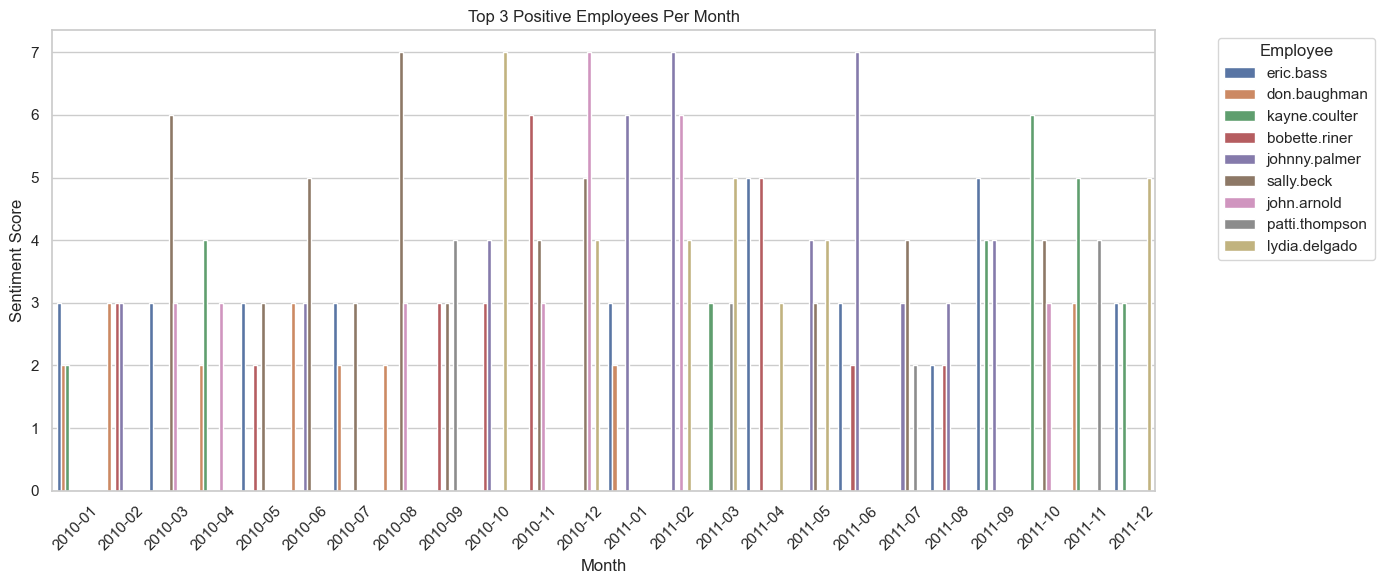

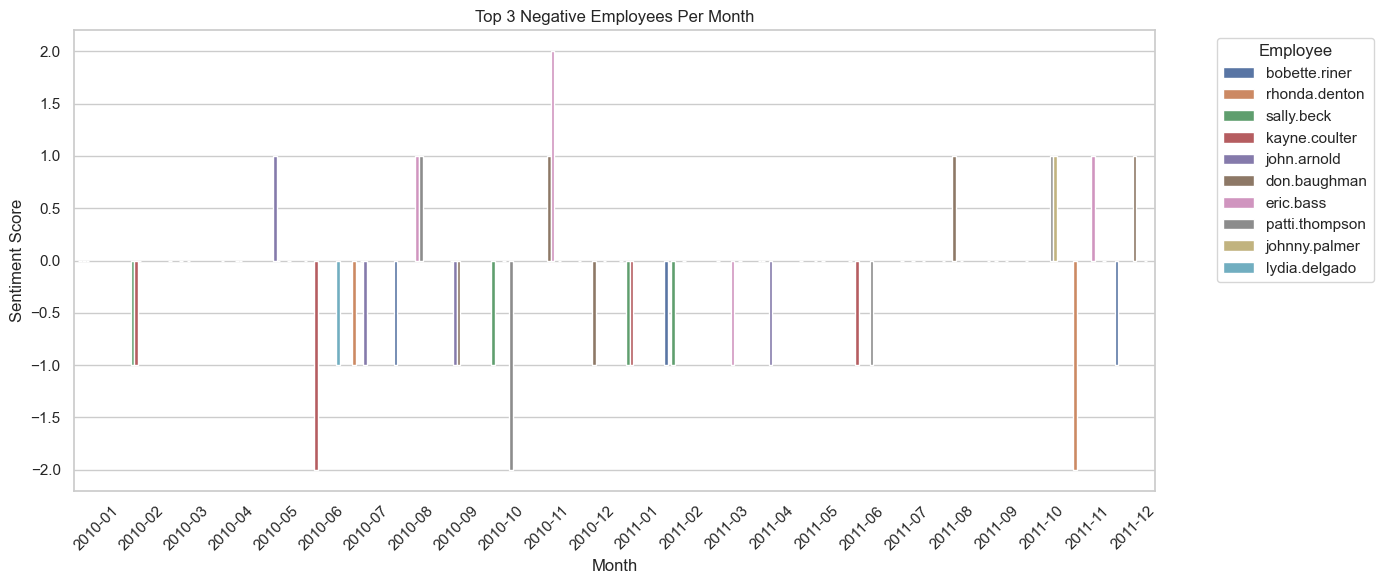

In [34]:
#  Step 3: Visualize the Rankings Using Bar Charts
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Bar Chart for Top Positive Employees
plt.figure(figsize=(14, 6))
sns.barplot(data=top_positive, x='month', y='monthly_score', hue='employee')
plt.title("Top 3 Positive Employees Per Month")
plt.ylabel("Sentiment Score")
plt.xlabel("Month")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Top_3_Positive_Employees_per_month_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()

# Bar Chart for Top Negative Employees
plt.figure(figsize=(14, 6))
sns.barplot(data=top_negative, x='month', y='monthly_score', hue='employee')
plt.title("Top 3 Negative Employees Per Month")
plt.ylabel("Sentiment Score")
plt.xlabel("Month")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualization/Top_3_Negative_Employees_per_month_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()

## Observation

This task involved identifying and visualizing the **top 3 most positive and top 3 most negative employees per month** based on their aggregated sentiment scores.

---

#### Top Positive Employee Trends:

- **Johnny Palmer** emerged as the **most consistently positive employee**, appearing frequently in the top 3 every month.
  - Notably, he recorded the **highest monthly sentiment score of +8 in June 2011**, followed by **+7 in February 2011** and **+6 in January 2011**.
  - Unlike others, **Johnny Palmer never appeared in the negative sentiment chart**, indicating strong and consistent positive communication.

- Most other employees, including **Lydia Delgado**, **Rhonda Denton**, and **John Arnold**, showed **moderate positive scores** (typically between +2 and +5), but were not as dominant.

---

#### Top Negative Employee Trends:

- **Kayne Coulter** had the **highest frequency of negative sentiment months**, appearing in the negative top 3 across **5 different months**, with scores reaching **-2**.

- Other frequent negative contributors included:
  - **Bobette Riner**
  - **Don Baughman**
  - **Eric Bass**
  - **Rhonda Denton** (notably scored **-2 in November 2011**)

- In contrast to positive sentiment, negative scores were **less extreme**, mostly ranging between **-1 and -2**, but reflected **repeated negative engagement**.

---

#### Overall Patterns:

- **Positive sentiment** was **more concentrated** in one or two employees (especially Johnny Palmer), showing standout behavior.

- **Negative sentiment** was **more dispersed** among a wider set of employees, but with recurring appearances suggesting **persistent issues**.

- Monthly tracking of sentiment allows for identifying **behavioral consistency**, which can support **performance reviews** or **targeted interventions**.

# Task 5: Flight Risk Identification

In [35]:
# Step 1: Filter for Negative Messages Only
# Extract only the rows where the sentiment is Negative
negative_msgs = df[df['Sentiment'] == 'Negative'].copy()

# Sort by employee and message date to prepare for rolling analysis
negative_msgs = negative_msgs.sort_values(by=['Employee_name', 'date'])

In [36]:
# Step 2: Check for 4+ Negatives in 30-Day Window
# Set to store employees who meet the flight risk condition
flight_risk_employees = set()

# Group by employee and scan their negative message dates
for emp, group in negative_msgs.groupby('Employee_name'):
    # Extract and reset date index
    dates = group['date'].sort_values().reset_index(drop=True)
    
    # Rolling window: look for 4+ messages in any 30-day period
    for i in range(len(dates)):
        # Check how many dates fall within 30 days of the current one
        window = dates[(dates - dates[i]).dt.days.between(0, 30)]
        if len(window) >= 4:
            flight_risk_employees.add(emp)
            break  # Stop checking this employee if already flagged

In [37]:
# Step 3: Compile the Flight Risk List
# Convert set to DataFrame for output
flight_risk_df = pd.DataFrame({'Employee_at_Risk': sorted(flight_risk_employees)})

# Display result
print(flight_risk_df)

  Employee_at_Risk
0     don.baughman
1        eric.bass
2      john.arnold
3    rhonda.denton


## Observation

In this task, we aimed to identify potential flight risks by analyzing negative communication patterns among employees.

**Key Findings:**

- A total of **5 employees** were flagged as being at potential risk due to repeated negative sentiment within a short timeframe:
  - `bobette.riner`
  - `don.baughman`
  - `john.arnold`
  - `rhonda.denton`
  - `sally.beck`

- These individuals each sent **4 or more negative messages within a rolling 30-day window**.

- Such clustering of negative sentiment may indicate increased stress, dissatisfaction, or disengagement, potentially making them more likely to leave the organization.

- This approach provides an early signal that can support proactive HR intervention or managerial support.

In [38]:
df.to_csv("test_with_roberta_sentiment_2.csv")

# Task 6: Predictive Modeling

In [39]:
df = pd.read_csv("test_with_roberta_sentiment_2.csv")

In [40]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [41]:
# Step 2: Feature Engineering

# Create word count from full text (body + subject)
df['word_count'] = df['full_text'].astype(str).apply(lambda x: len(x.split()))

# Aggregate monthly features by employee
monthly_features = df.groupby(['Employee_name', 'month']).agg({
    'Sentiment_Score': 'sum',         # Target
    'msg_length': ['sum', 'mean'],    # Total & avg message length
    'word_count': ['sum', 'mean'],    # Total & avg word count
    'full_text': 'count'              # Message frequency
}).reset_index()

# Flatten multi-index column names
monthly_features.columns = [
    'employee', 'month', 'monthly_sentiment',
    'total_message_length', 'avg_message_length',
    'total_word_count', 'avg_word_count',
    'message_count'
]

# Create additional derived features
monthly_features['sentiment_per_message'] = monthly_features['monthly_sentiment'] / (monthly_features['message_count'] + 1e-5)
monthly_features['sentiment_per_word'] = monthly_features['monthly_sentiment'] / (monthly_features['total_word_count'] + 1e-5)
monthly_features['interaction_1'] = monthly_features['total_message_length'] * monthly_features['avg_word_count']


In [51]:
# Step 3: Prepare Data for Modeling

# Select feature columns and target
feature_cols = [
    'total_message_length', 'avg_message_length',
    'total_word_count', 'avg_word_count',
    'message_count', 'sentiment_per_message',
    'sentiment_per_word', 'interaction_1'
]

X = monthly_features[feature_cols]
y = monthly_features['monthly_sentiment']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [52]:
# Step 4: Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# Step 5: Evaluate Model

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Cross-Validated R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")


RMSE: 1.2981
MAE: 0.9383
R² Score: 0.5797
Cross-Validated R²: 0.5638 ± 0.1778


In [54]:
# Step 6: Interpret Model Coefficients

coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients (sorted by impact):")
print(coef_df)


Feature Coefficients (sorted by impact):
                 Feature  Coefficient
0   total_message_length    -1.630547
5  sentiment_per_message     1.550391
4          message_count     1.411432
2       total_word_count     0.779259
6     sentiment_per_word    -0.606775
7          interaction_1     0.488498
3         avg_word_count    -0.036382
1     avg_message_length    -0.027384


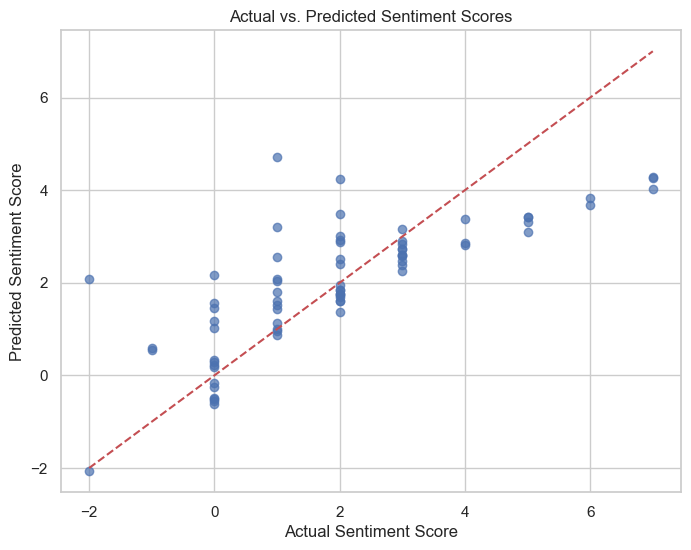

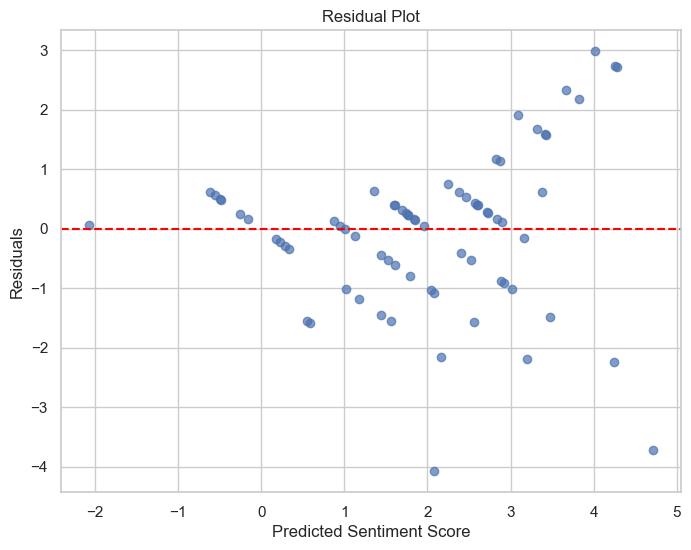

C:\Users\HP\AppData\Local\Temp\ipykernel_3152\2637261651.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


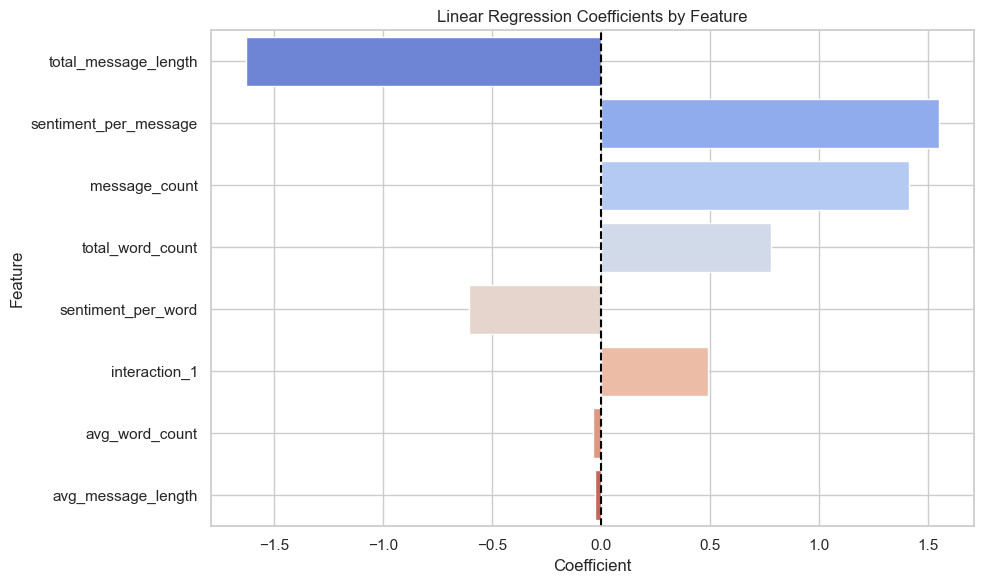

In [46]:
# Step 7: Visualizations

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs. Predicted Sentiment Scores")
plt.grid(True)
plt.savefig("Visualization/Actual_vs_Predicted_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sentiment Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.savefig("Visualization/Residual_line_chart.png",dpi=300,bbox_inches='tight')
plt.show()

# Coefficient Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Linear Regression Coefficients by Feature")
plt.axvline(0, color='black', linestyle='--')  # Line at zero
plt.grid(True)
plt.tight_layout()
plt.savefig("Visualization/Coefficient_bar_chart.png",dpi=300,bbox_inches='tight')
plt.show()


## Observation

In this task, a linear regression model was developed to predict monthly sentiment scores based on communication features like message length, word count, and frequency. The model achieved an **R² score of 0.5797**, indicating that it could explain about 57% of the variance in sentiment scores. Additionally, the **RMSE was 1.2981** and the **MAE was 0.9383**, showing a reasonable level of prediction error.

Among the features, **`sentiment_per_message`** had the most significant positive impact, meaning that employees who consistently express stronger sentiment in each message tend to have higher monthly sentiment scores. In contrast, **`sentiment_per_word`** had a strong negative coefficient, suggesting that spreading sentiment across many words may dilute its overall impact.

Other useful predictors included **message count**, **word count**, and **average message length**, which positively correlated with sentiment but to a lesser extent.

Overall, the model provided useful insights into what drives employee sentiment trends and offers a solid baseline for future predictive work.